In [1]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('c:/Users/PC/Downloads/mental-heath-in-tech-2016_20161114.csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Users/PC/Downloads/mental-heath-in-tech-2016_20161114.csv'

In [ ]:
print("Total number of participants in 2016 : {0}".format(df.shape[0]))

print("Total number of questions in 2016 survey : {0}".format(df.shape[1]))

Total number of participants in 2016 : 1433
Total number of questions in 2016 survey : 63


In [ ]:
prev_cols = df.columns

prev_cols


Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [ ]:
df.columns[-16]

'Do you currently have a mental health disorder?'

In [ ]:
# Feature in the current dataset needs renaming , it will be easier for us in further analysis
# 1. Renaming Features
renamed_features = ['self_empl_flag', 'comp_no_empl',  'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                    'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                    'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 
                    'mh_discussion_supervisor', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2',
                    'mh_online_res_flag', 'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 
                    'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact', 'mh_prod_impact', 'mh_prod_impact_perc',
                    'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness', 'prev_mh_discussion', 
                    'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq', 
                    'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 
                    'prev_mh_conseq_coworkers', 'future_ph_specification', 'why/why_not', 'future_mh_specification',
                    'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork', 'mh_sharing_friends/fam_flag', 
                    'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist', 'mh_disorder_past',
                    'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                    'yes:condition_diagnosed', 'mh_sought_proffes_treatm',  'mh_eff_treat_impact_on_work', 
                    'mh_not_eff_treat_impact_on_work', 'age', 'sex',  'country_live', 'live_us_teritory', 'country_work', 
                    'work_us_teritory',  'work_position','remote_flag']

df.columns = renamed_features
df.head()

,self_empl_flag,comp_no_empl,tech_comp_flag,tech_role_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [ ]:
df.describe()

,self_empl_flag,tech_comp_flag,tech_role_flag,mh_coverage_flag2,prev_employers_flag,mh_sought_proffes_treatm,age
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


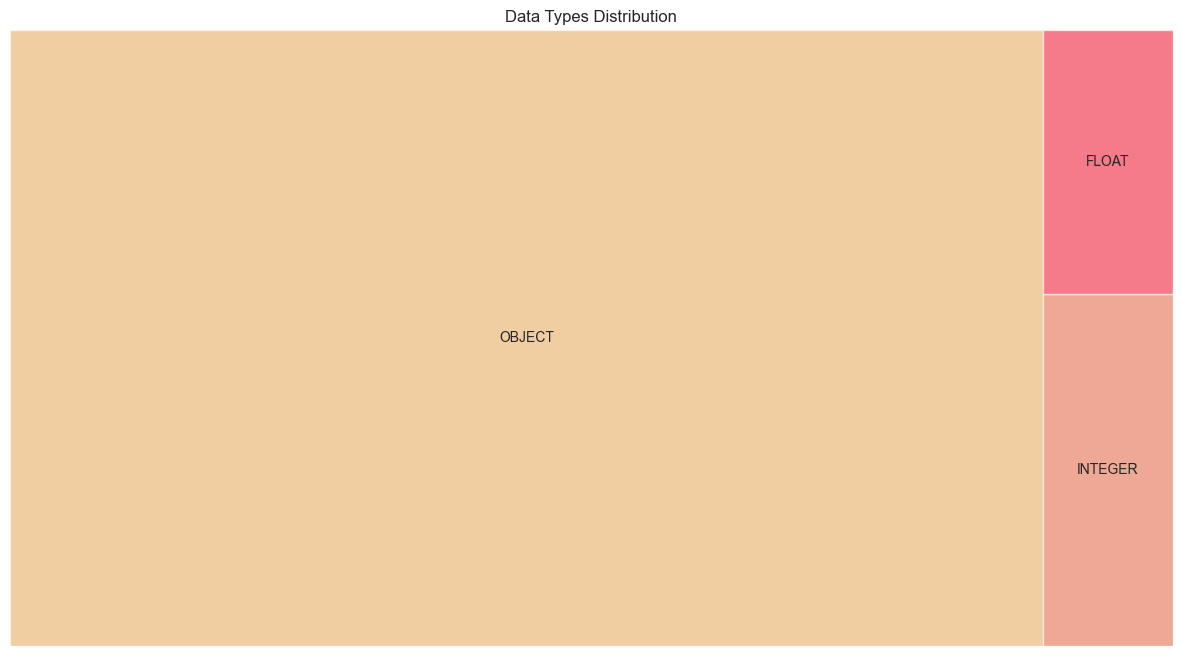

In [ ]:
dtype_data = {'Labels' : ['OBJECT', 'INTEGER', 'FLOAT'] , 'Count' : df.dtypes.value_counts()}

dtype_df = pd.DataFrame(dtype_data)

fig = plt.figure(figsize=(15, 8))

colors=['#e8ac65','#e76f51','#ef233c']

sns.set_style(style="whitegrid")

count = dtype_df['Count'].values

label = dtype_df['Labels']

squarify.plot(sizes=count, label=label, alpha=0.6,color=colors).set(title='Data Types Distribution')

plt.axis('off')

plt.show()

<Axes: xlabel='age', ylabel='Density'>

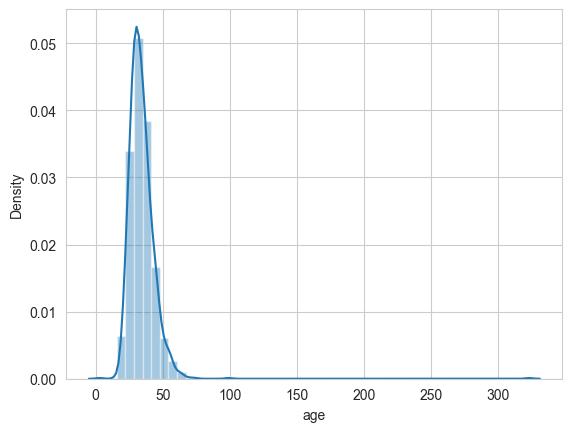

In [ ]:
sns.distplot(df['age'])

In [ ]:
median_age = df[(df['age'] >= 18) | (df['age'] <= 75)]['age'].median()

print("Median Age is :", median_age)

df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].to_list(), value = median_age, inplace = True)

Median Age is : 33.0


In [ ]:
df['sex'].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [ ]:
# Encoding 'sex' feature
# Man - 0, Female - 1, Other - 2
df['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'male 9:1 female, roughly','Male (cis)',
                                 'Cis male', 'Male.', 'Man', 'Sex is male', 'cis male', 'Malr', 'Dude',
                                "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                                 'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)',
                                'cisdude', 'cis man', 'MALE'
                               ], value = 0, inplace = True)

df['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ', 
                                'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
                               'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
                                'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
                                ' Female', 'Cis-woman', 'female-bodied; no feelings about gender', 'AFAB', 'F', 'f',
                                'Woman', 'fm', 'Female assigned at birth '
                               ], value = 1, inplace = True)

df['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',  'Androgynous', 
                                'Other', 'nb masculine', 'none of your business', 'genderqueer', 'Human', 'Genderfluid',
                                'Enby', 'genderqueer woman', 'mtf', 'Queer','Agender', 'Fluid', 'Nonbinary', 'human',
                                'Unicorn', 'Genderqueer', 'Genderflux demi-girl', 'Transgender woman'
                               ], value = 2, inplace = True)


In [ ]:
df['comp_no_empl'].unique()

array(['26-100', '6-25', nan, 'More than 1000', '100-500', '500-1000',
       '1-5'], dtype=object)

In [ ]:
df['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)

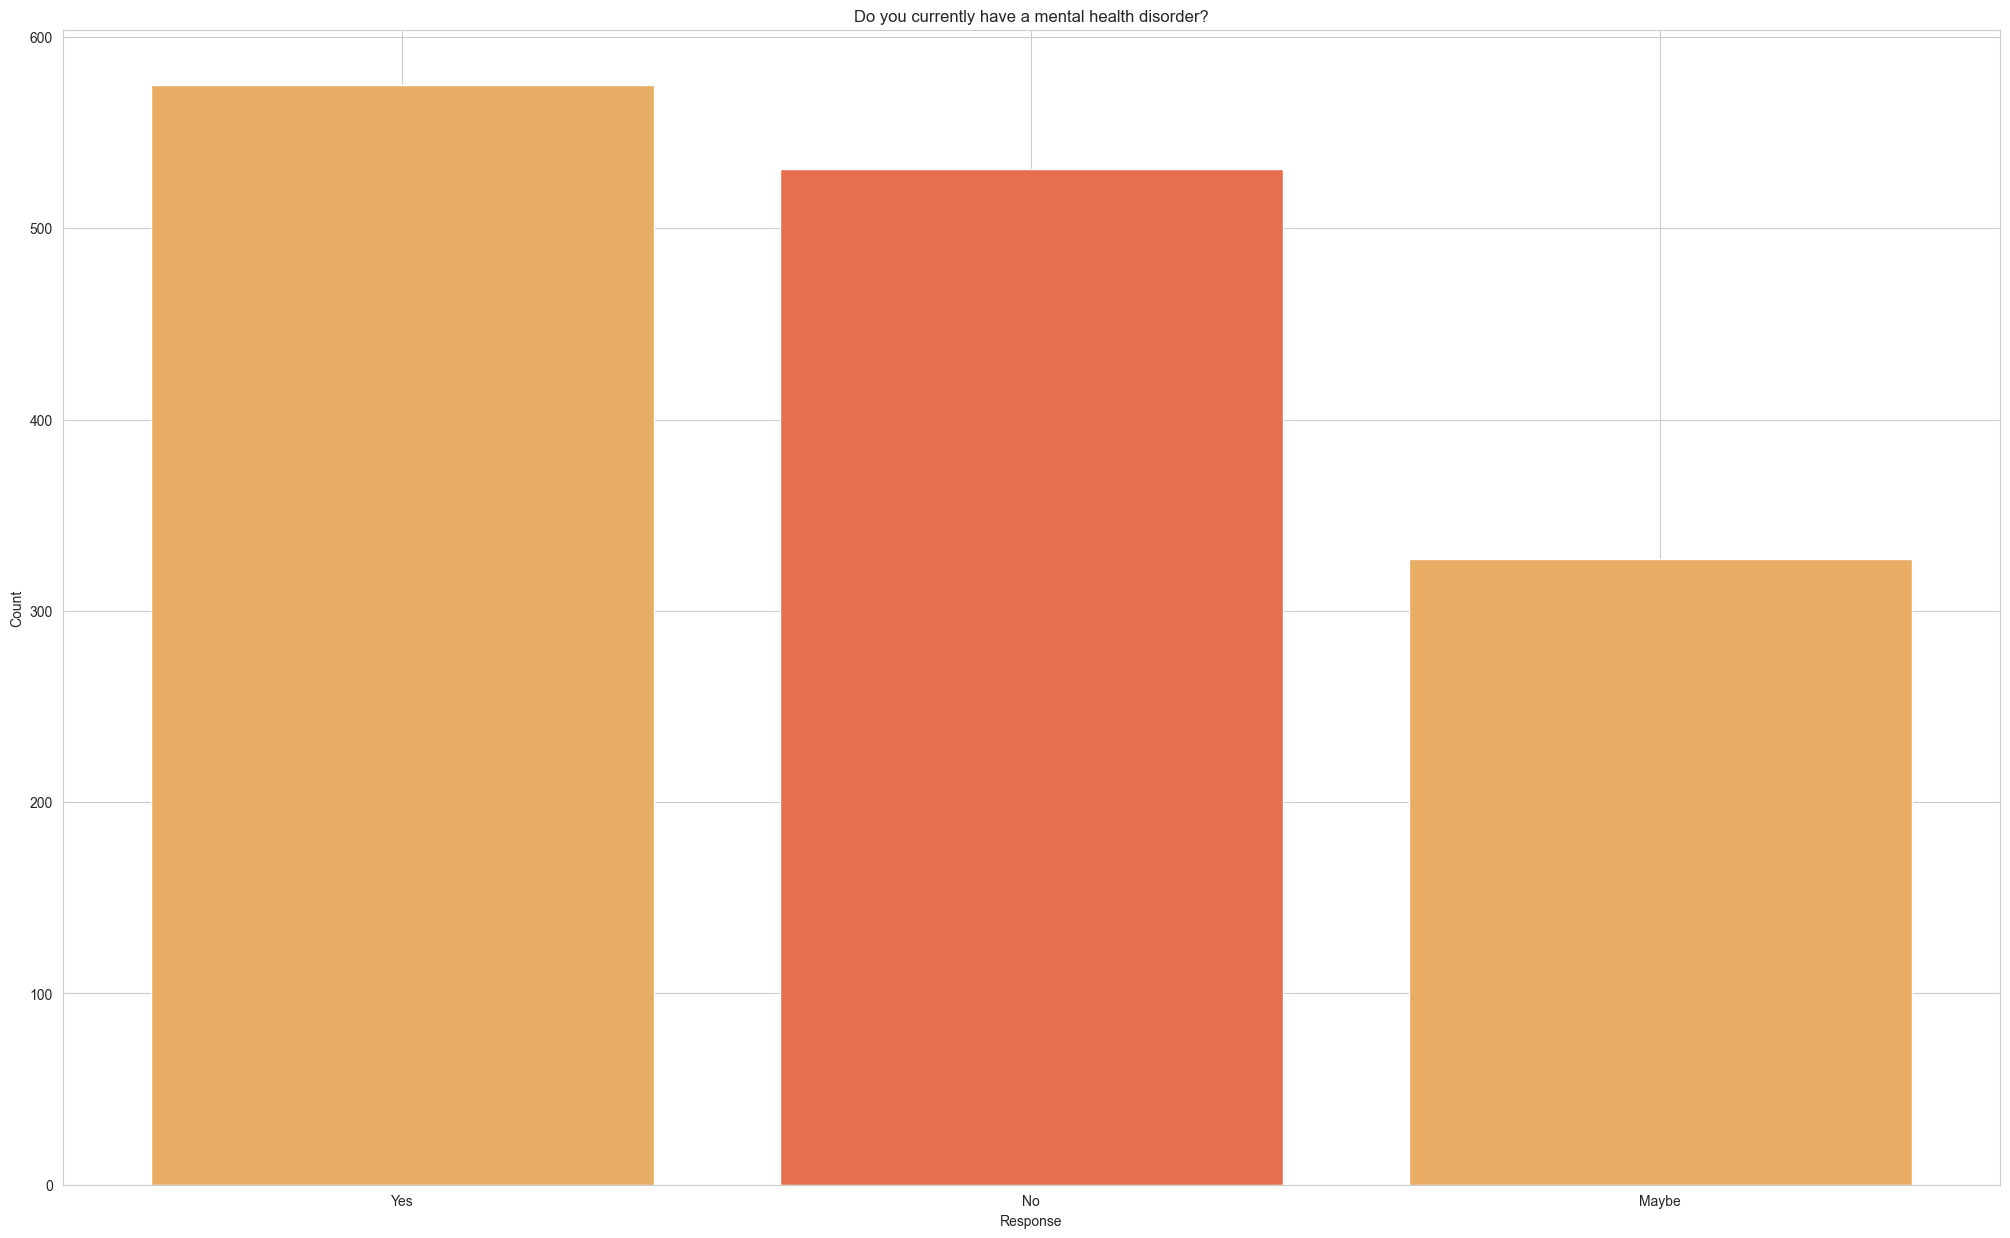

In [ ]:
# Target feature count
df['mh_disorder_current'].value_counts()

fig = plt.figure(figsize=(25, 15))
        
plt.bar(sorted(df['mh_disorder_current'].unique(), reverse = True), df['mh_disorder_current'].value_counts()[:], 
        color = colors[:2])
        
plt.title('Do you currently have a mental health disorder?')
        
plt.xlabel("Response")
        
plt.ylabel("Count")
        
plt.show()

In [ ]:
# Encoding Target Feature

df['mh_disorder_current'].replace(to_replace=['Yes', 'No', 'Maybe'], value=[1, 0, 2], inplace = True)

#df['mh_disorder_current'] = df['mh_disorder_current'].astype('int64')

pd.to_numeric(df['mh_disorder_current'])

0       0
1       1
2       0
3       1
4       1
       ..
1428    0
1429    0
1430    2
1431    1
1432    1
Name: mh_disorder_current, Length: 1433, dtype: int64

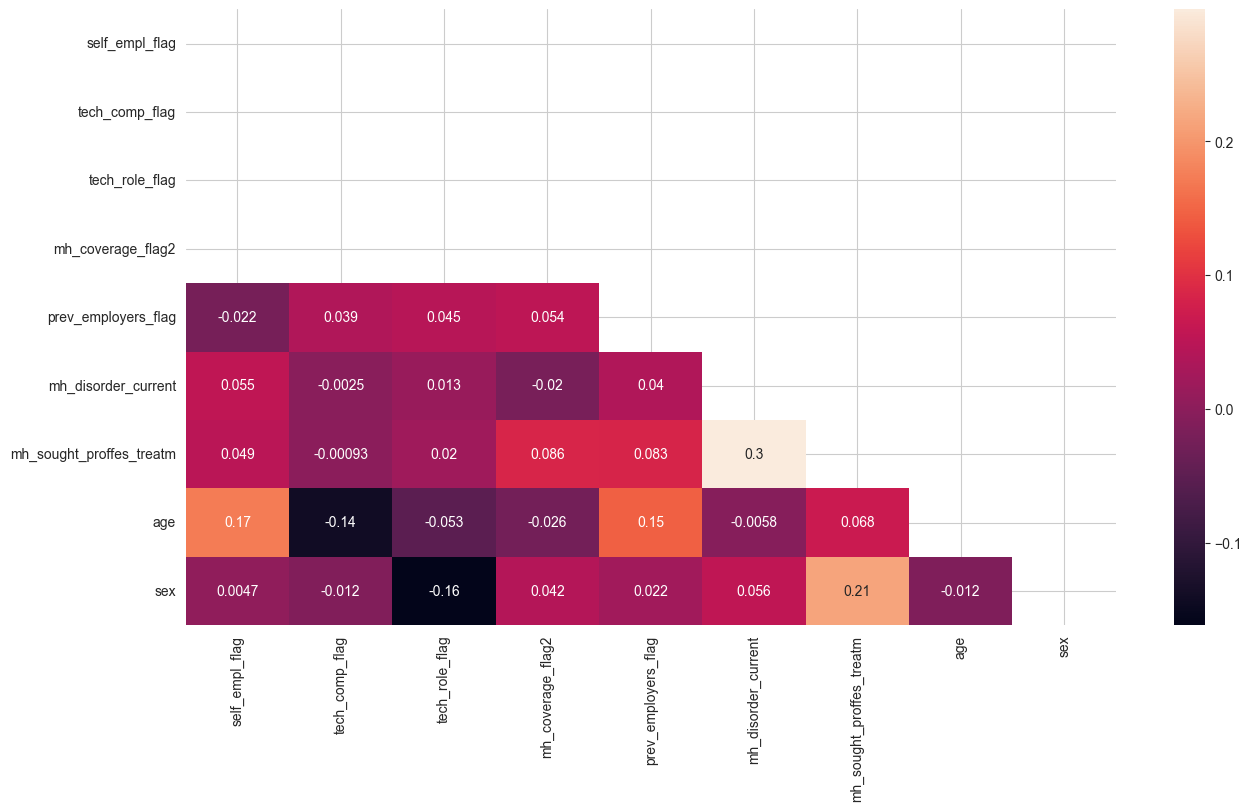

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Drop columns with non-numeric values
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Continue with the rest of the code
fig = plt.figure(figsize=(10, 8))

train = df_numeric

train = train[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

corr_ = train.corr()

mask = np.zeros_like(corr_)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_, mask = mask, annot = True)

plt.show()


In [ ]:
class Missing:
    
    def __init__(self, features_list, features_count):
        
        self.features_list = features_list
        
        self.features_count = features_count
        
        self.color = ['#0A2647', '#144272', '#205295', '#2C74B3', '#8BF5FA', '#3F979B']
        
    def add_labels(self, x, y):
    
        for i in range(len(x)):
        
            plt.text(y[i] + 12, i , y[i], ha = 'center')
    
    def missing_feature(self, typ):
        
        fig = plt.figure(figsize=(25, 15))
        
        plt.barh(self.features_list, self.features_count, color = self.color)
        
        plt.title("{0} Features with missing values in training dataset".format(typ))
        
        plt.xlabel("Features")
        
        plt.ylabel("Missing Count")
        
        #plt.legend(["Nan"], loc="upper right")
        
        self.add_labels(self.features_list, self.features_count)

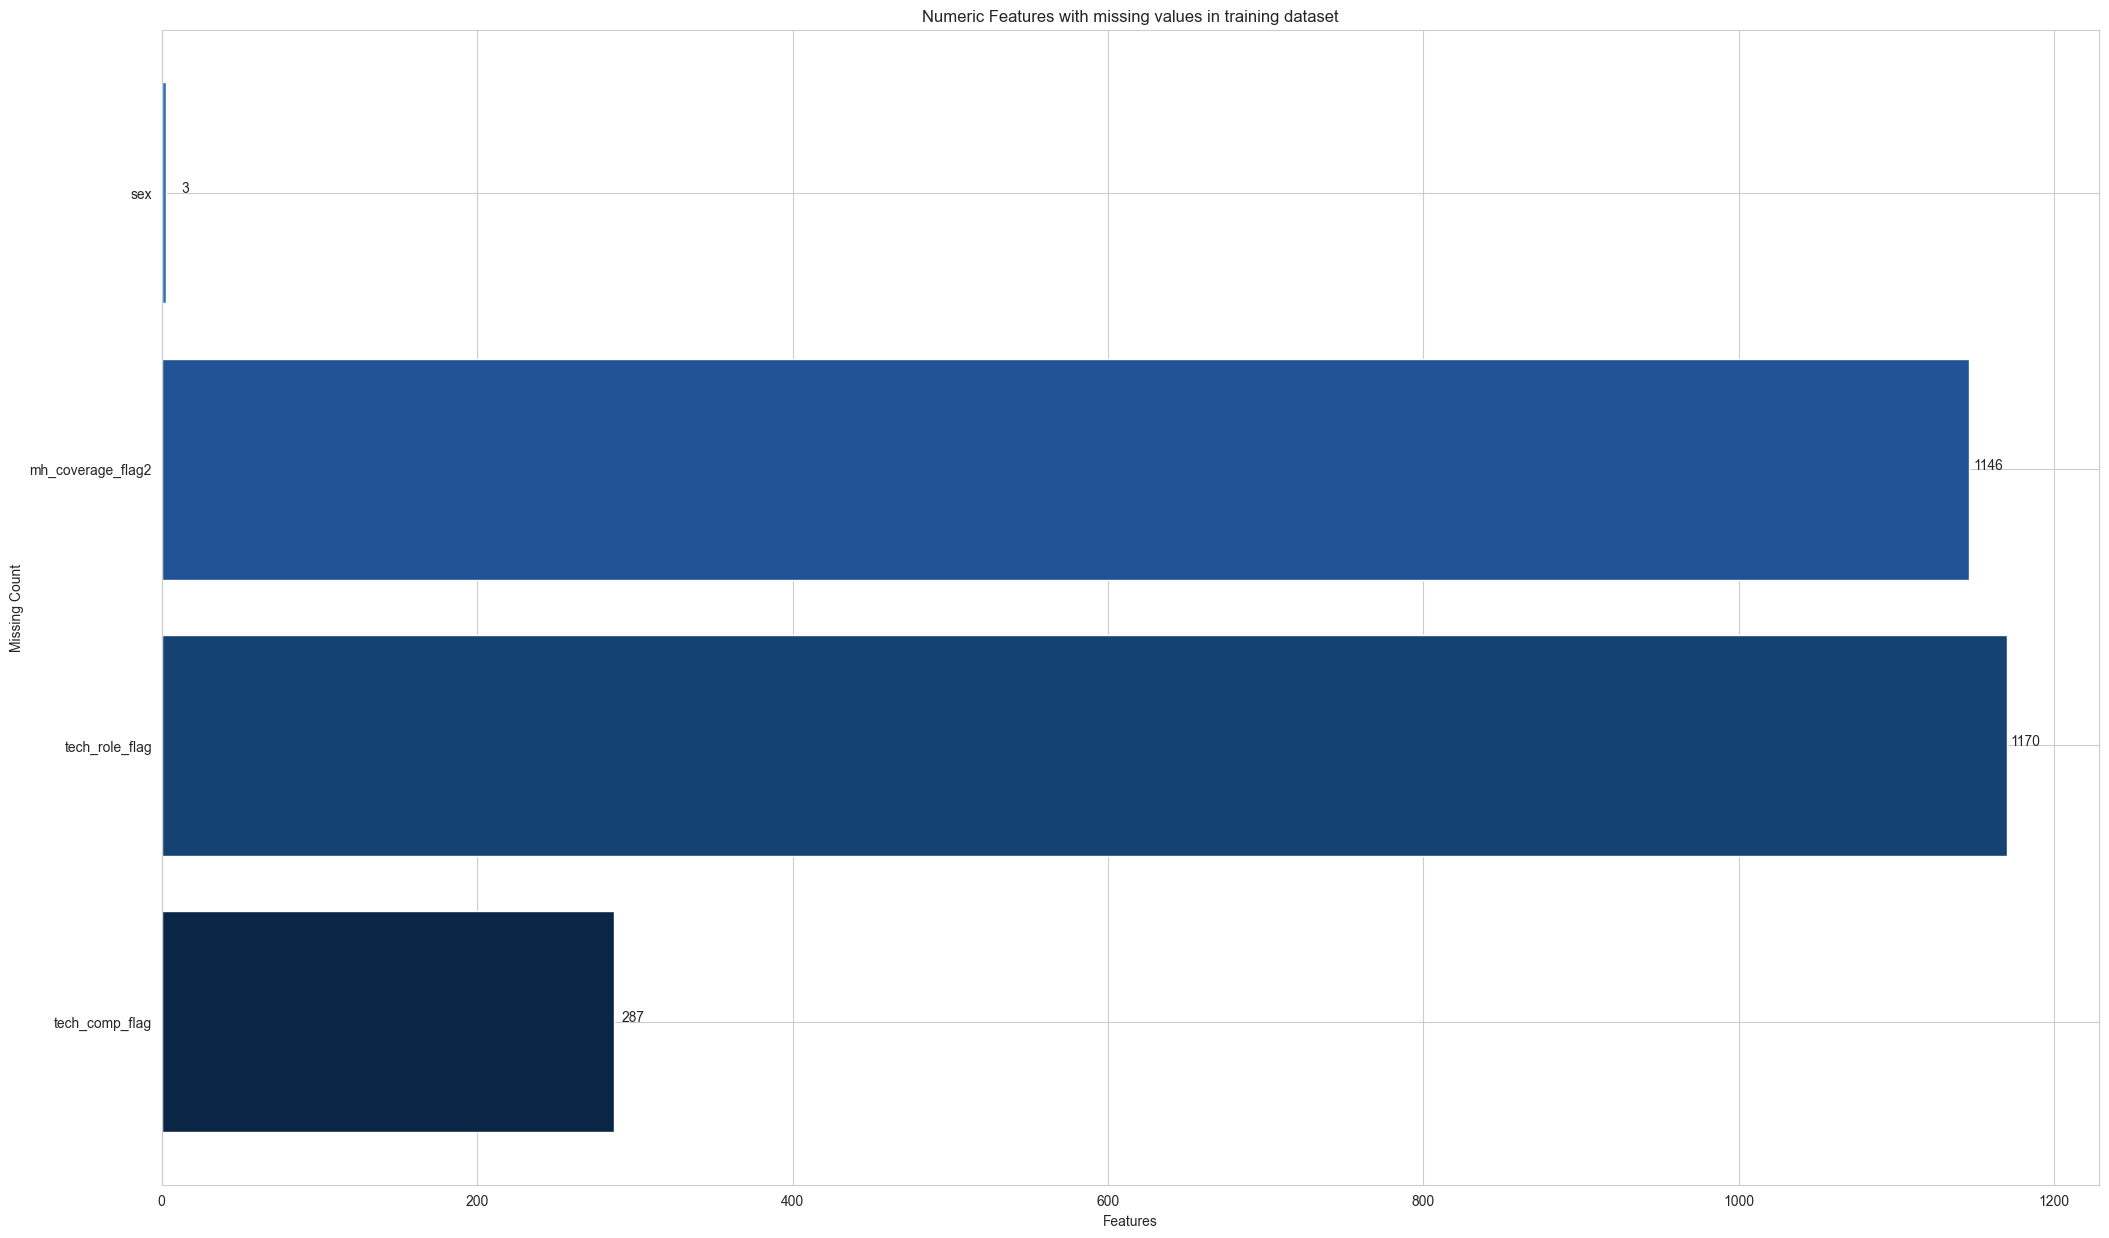

In [ ]:
features_list = [col for col in df.columns if df[col].dtype != "object" and df[col].isna().sum() > 0]

features_count = [df[col].isna().sum() for col in df.columns if df[col].isna().sum() > 0 and  df[col].dtype != "object"]

missing = Missing(features_list, features_count)

missing.missing_feature("Numeric")

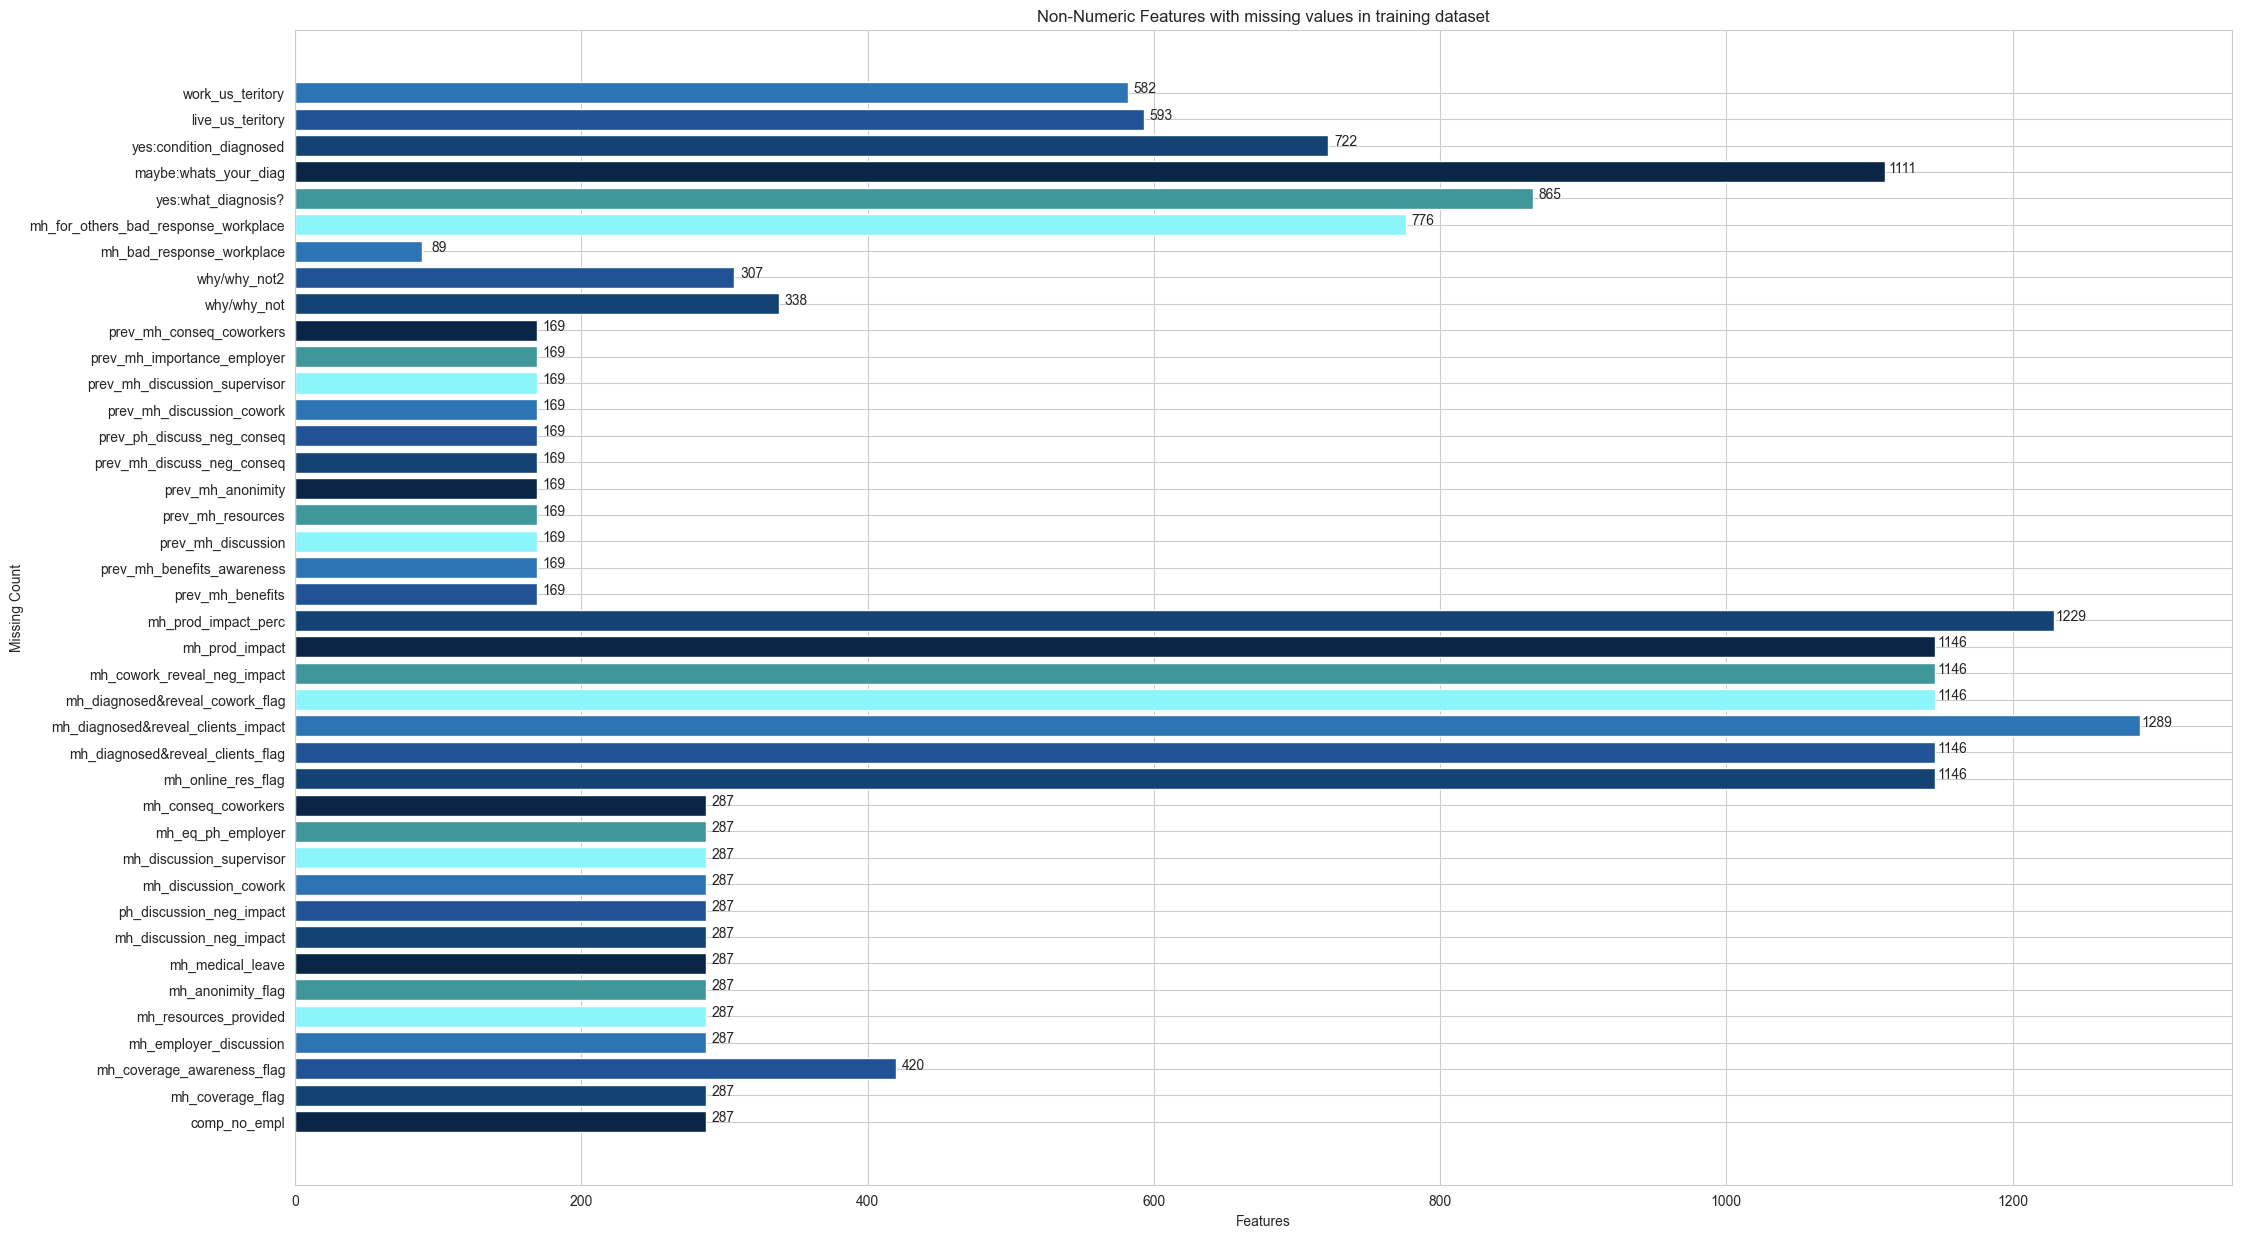

In [ ]:
features_list = [col for col in df.columns if df[col].dtype == "object" and df[col].isna().sum() > 0]

features_count = [df[col].isna().sum() for col in df.columns if df[col].isna().sum() > 0 and  df[col].dtype == "object"]

missing = Missing(features_list, features_count)

missing.missing_feature("Non-Numeric")

In [ ]:
# Dropping Features 
dropped_feat = [col for col in df.columns if df[col].isna().sum() >= 0.60 * df.shape[0]]

#dropped_feat_fif = [col for col in df.columns if df[col].isna().sum() >= 0.50 * df.shape[0]]

#print(set(dropped_feat_fif) - set(dropped_feat))

df.drop(labels = dropped_feat, axis = 1, inplace = True)

print("Number of features dropped : ", len(dropped_feat))

Number of features dropped :  11


In [ ]:
from sklearn.impute import SimpleImputer

num_col = ['tech_comp_flag', 'sex']

smpl_num_imp = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

smpl_num_imp.fit(df['tech_comp_flag'].array.reshape(-1, 1))

smpl_num_imp.fit(df['sex'].array.reshape(-1, 1))

df['tech_comp_flag'] = smpl_num_imp.transform(df['tech_comp_flag'].array.reshape(-1, 1))

df['sex'] = smpl_num_imp.transform(df['sex'].array.reshape(-1, 1))

In [ ]:
# Compute remaining missing values using <<<<<<<<<< Simple Imputer >>>>>>>>>

smpl_imp = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

smpl_imp.fit(df)

df = pd.DataFrame(data = smpl_imp.transform(df), columns = df.columns).astype(df.dtypes.to_dict())

In [ ]:
df

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,0.0,United Kingdom,California,United Kingdom,California,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,0.0,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,0.0,United Kingdom,California,United Kingdom,California,Back-end Developer,Always
3,1,26-100,0.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Sometimes,Sometimes,43,0.0,United Kingdom,California,United Kingdom,California,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,1.0,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,26-100,0.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Not applicable to me,Not applicable to me,34,1.0,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,26-100,0.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Sometimes,Often,56,0.0,United States of America,California,Afghanistan,California,Support,Sometimes
1430,0,100-500,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,...,Rarely,Sometimes,52,0.0,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,Maybe,...,Sometimes,Often,30,1.0,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [ ]:
# Keeping only countries with response > 20

countries = [country for country, value in df['country_live'].value_counts().items()
             if value > 20]

df = df[df['country_live'].isin(countries)]

df.shape

(1239, 52)

In [ ]:
df_mh_disorder = df.loc[df['mh_disorder_current'] == 1]

df_mh_disorder.shape

(528, 52)

In [ ]:
class Pie:
    
    def __init__(self, feat1, feat2):
        
        self.startangle = 90
        
        self.shadow = True
        
        self.autopct = '%1.1f%%'
        
        self.feature1 = feat1
        
        self.feature2 = feat2
        
    def distribution_visual(self, label1, label2, title):
        
        plt.figure(figsize=(50,50))
        
        fig, (ax1, ax2) =  plt.subplots(1, 2)

        ax1.pie(df_mh_disorder[self.feature1].value_counts(), labels = label1, startangle=self.startangle, 
                 shadow = self.shadow, autopct=self.autopct)
        
        ax1.set_title(title[0], fontsize = 20)
        
        ax2.pie(df_mh_disorder[self.feature2].value_counts(), labels = label2,  startangle=self.startangle, 
                shadow = self.shadow, autopct=self.autopct)
        
        ax2.set_title(title[1], fontsize = 20)
        
        plt.gcf().set_size_inches(25, 25)
        
        plt.show()
        
class CountPlot(Pie):
    
    def __init__(self, feat1, feat2):
        
        super().__init__(feat1, feat2)
        
    def distribution_visual(self, h, plt_title):
        
        plt.figure(figsize=(50,30))
        
        fig, (ax1, ax2) =  plt.subplots(1, 2)

        sns.countplot(y=df_mh_disorder[self.feature1], hue = df_mh_disorder[h], 
                      ax = ax1)
        
        ax1.set_title(plt_title[0], fontsize = 20)
        
        sns.countplot(y=df_mh_disorder[self.feature2], hue = df_mh_disorder[h],
                      ax = ax2)
        
        ax2.set_title(plt_title[1], fontsize = 20)
        
        plt.gcf().set_size_inches(20, 20)
        
        plt.show()

<Figure size 5000x5000 with 0 Axes>

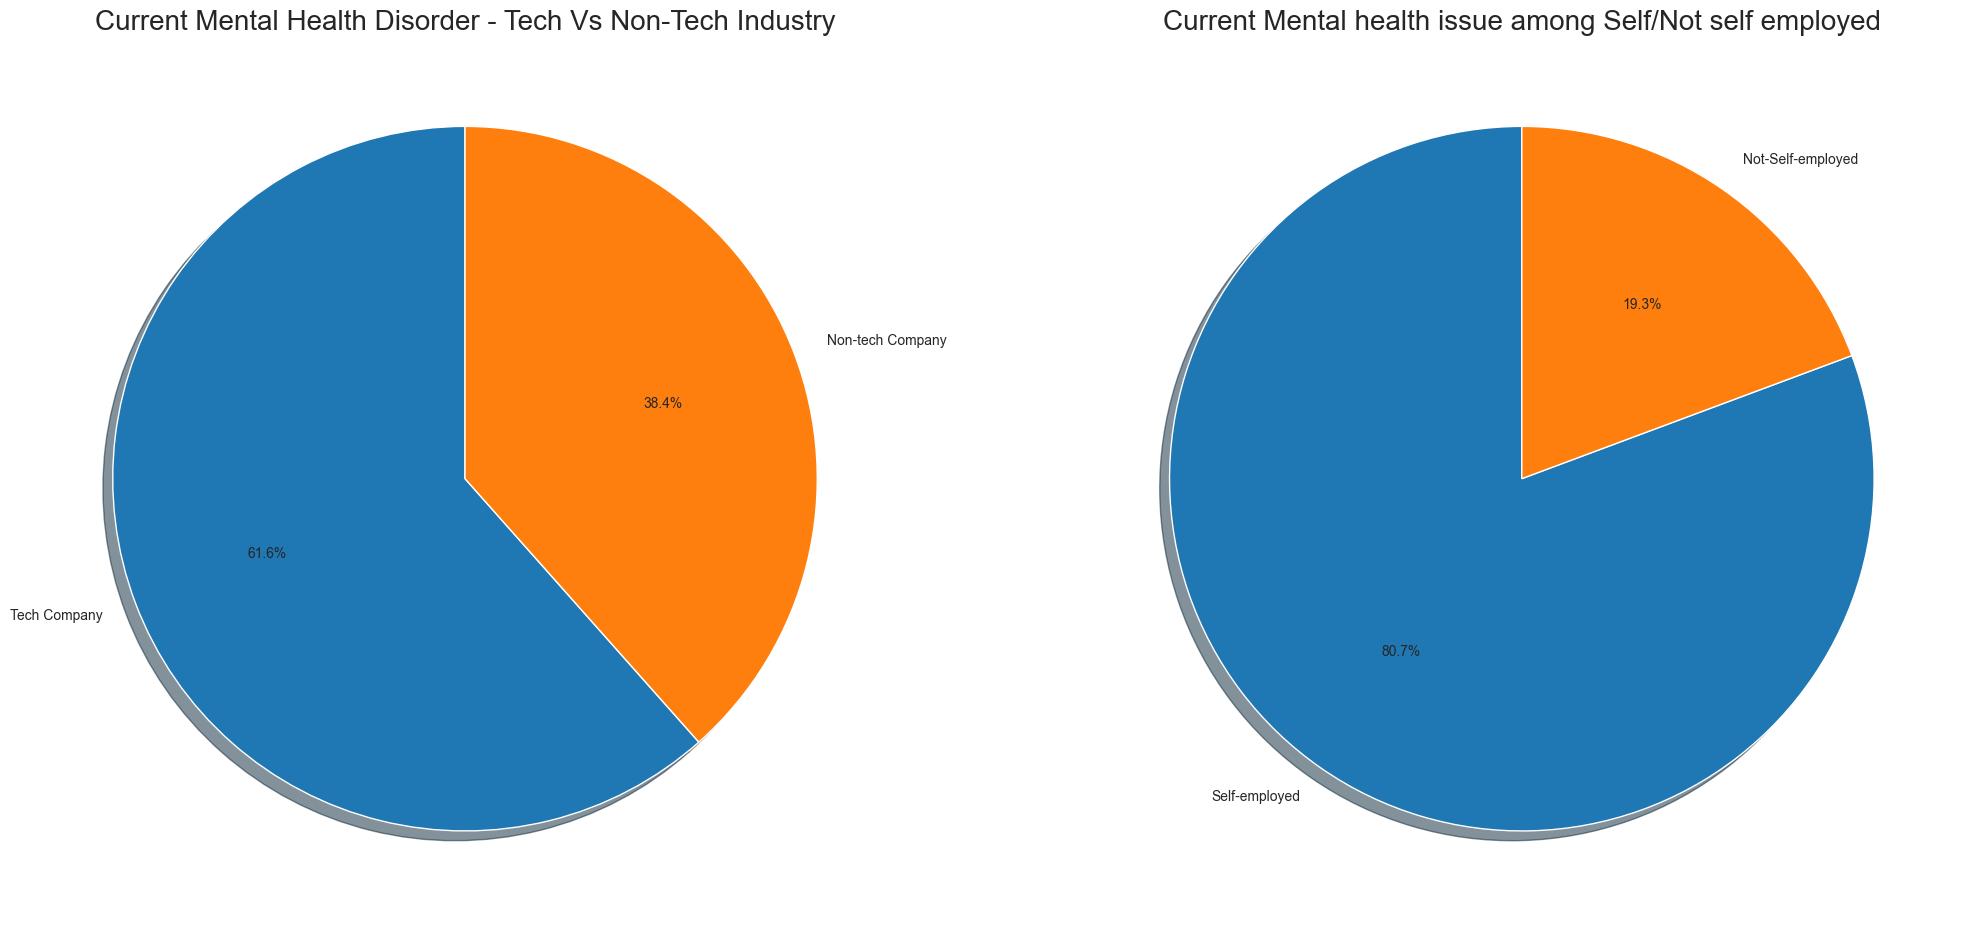

In [ ]:
pie = Pie('tech_comp_flag', 'self_empl_flag')

title = ["Current Mental Health Disorder - Tech Vs Non-Tech Industry", 
         "Current Mental health issue among Self/Not self employed"]

tech_comp_labels = ['Tech Company', 'Non-tech Company']

self_emp_labels = ['Self-employed', 'Not-Self-employed']

pie.distribution_visual(tech_comp_labels, self_emp_labels, title)

<Figure size 5000x5000 with 0 Axes>

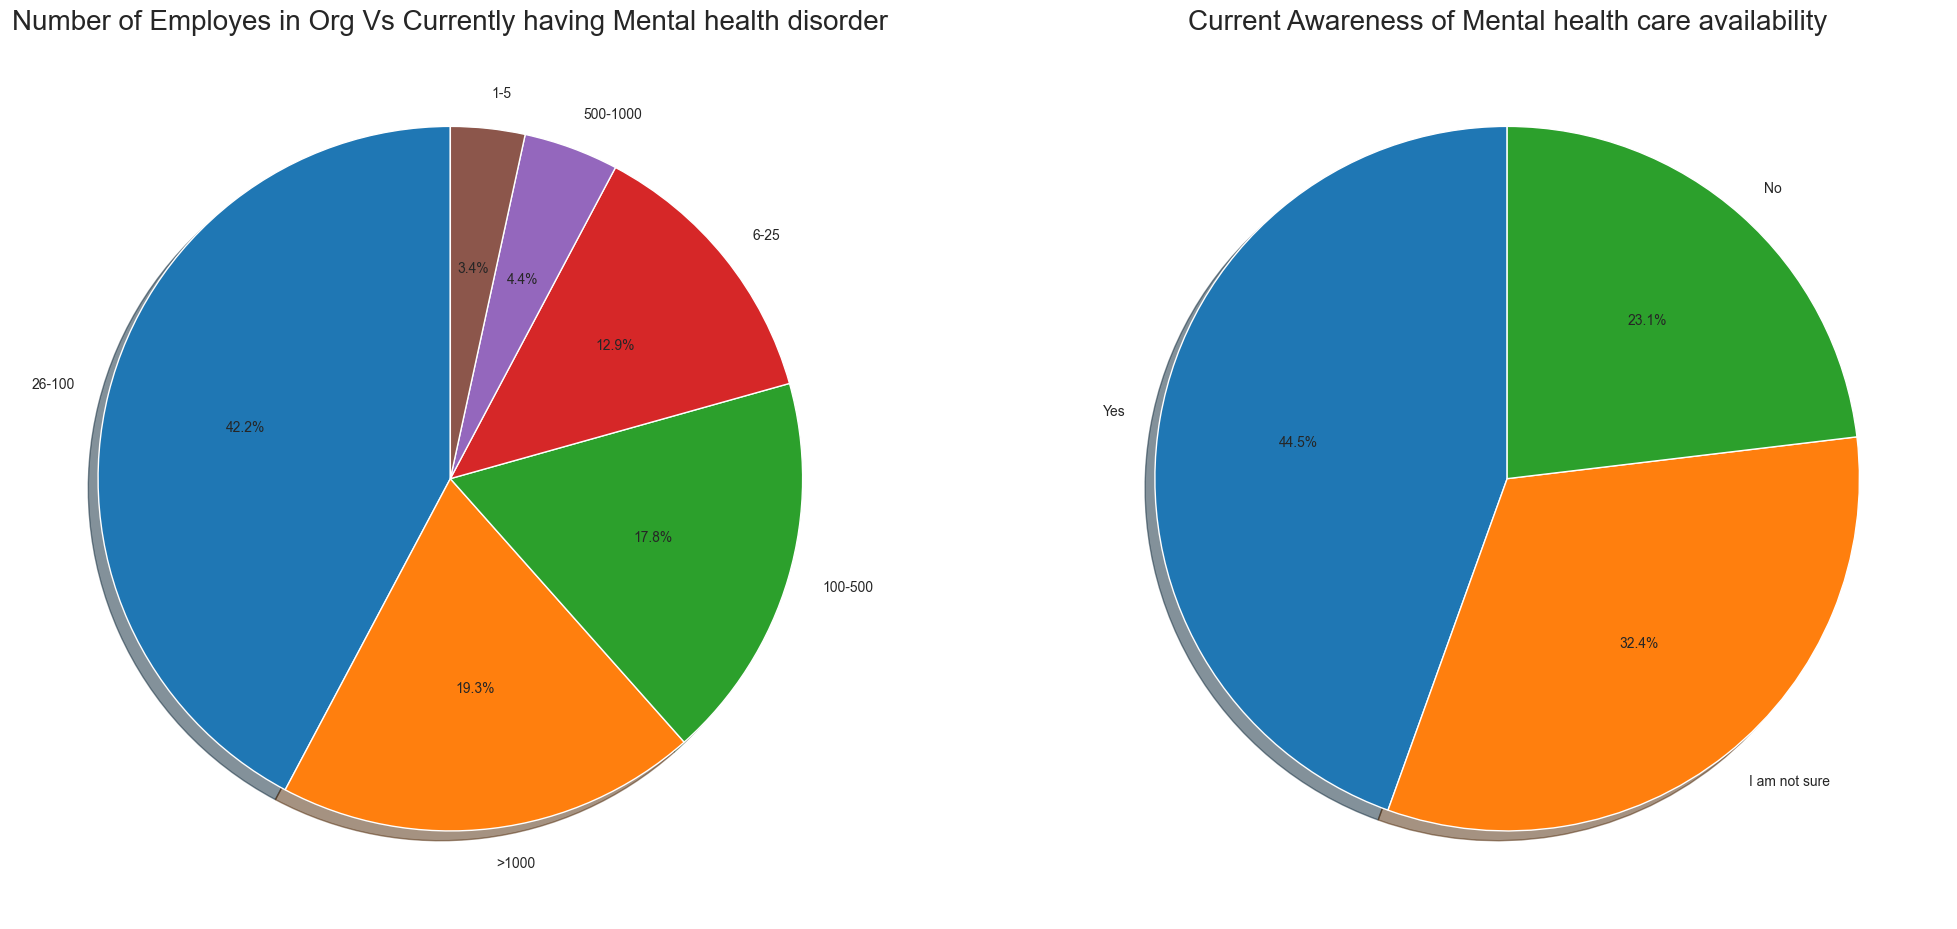

In [ ]:
pie = Pie('comp_no_empl', 'mh_coverage_awareness_flag')

comp_no_empl_labels = ['26-100', '>1000', '100-500', '6-25', '500-1000', '1-5']

awareness_labels = ['Yes', 'I am not sure', 'No']

title = ["Number of Employes in Org Vs Currently having Mental health disorder", 
         "Current Awareness of Mental health care availability"]

pie.distribution_visual(comp_no_empl_labels, awareness_labels, title)

<Figure size 5000x3000 with 0 Axes>

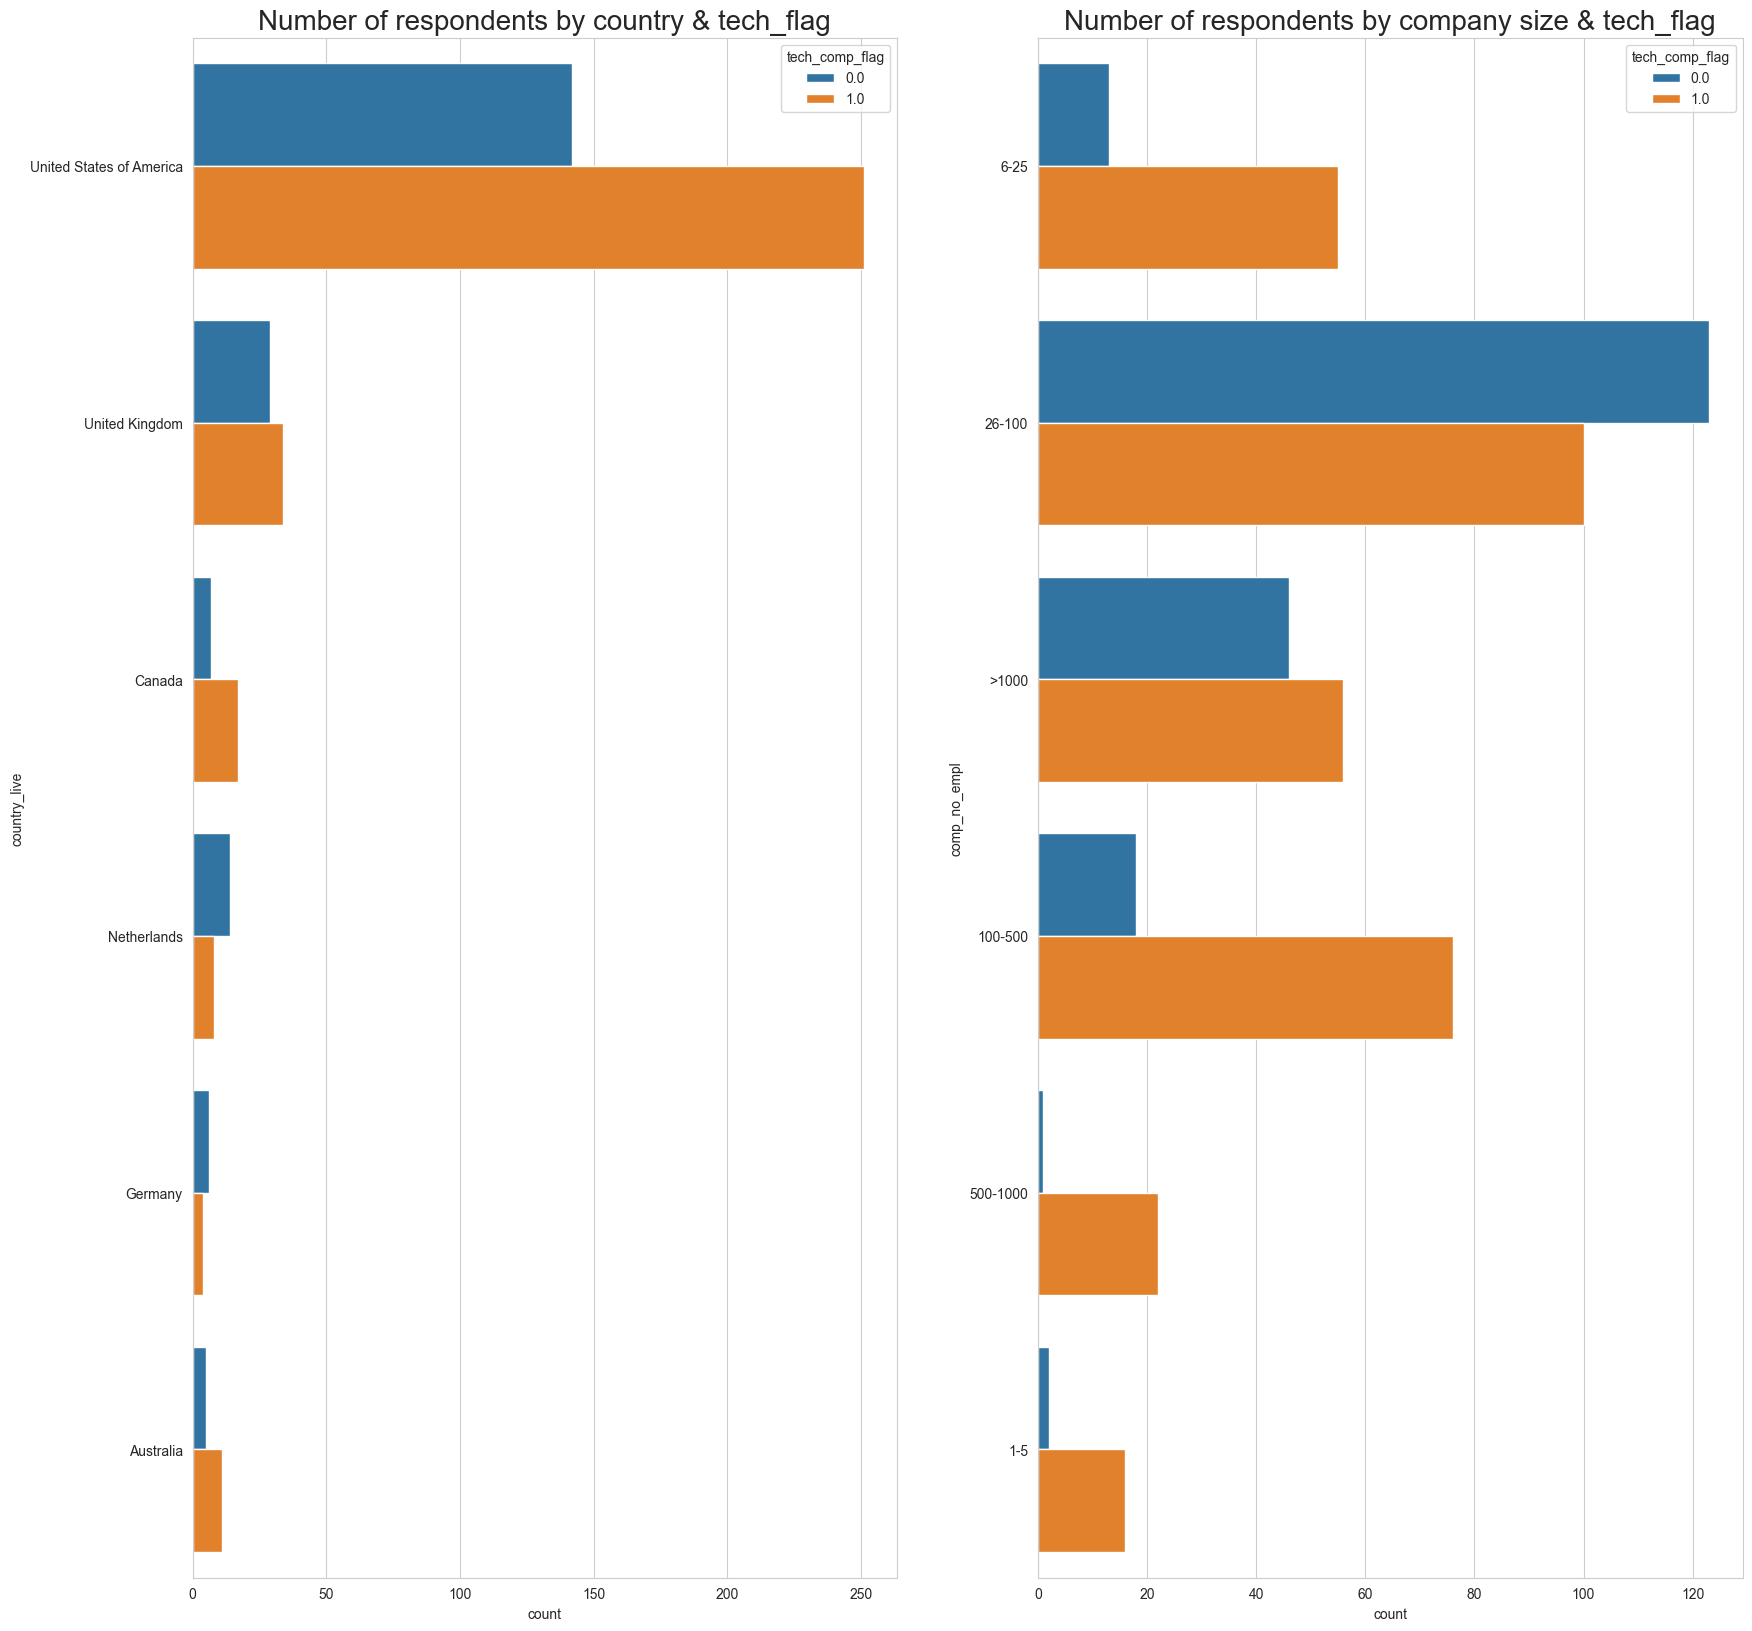

In [ ]:
cplot = CountPlot('country_live', 'comp_no_empl')

plt_title = ["Number of respondents by country & tech_flag", 
         "Number of respondents by company size & tech_flag"]

#country_live = countries

#tech_comp_labels = ['Tech Company', 'Non-tech Company']

cplot.distribution_visual('tech_comp_flag', plt_title)

In [ ]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBClassifier, XGBRFClassifier


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score
from sklearn import preprocessing 

In [ ]:
df_model = df.copy()

num_col = [col for col in df_model.columns if df_model[col].dtype in ['int64', 'float64']]

print(num_col)

df_model = df_model[num_col]

cols = [col for col in df_model.columns if col not in ['mh_disorder_current']]

X = df_model[cols]

# Target Variable
Y = df['mh_disorder_current']

# Dataset Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


['self_empl_flag', 'tech_comp_flag', 'prev_employers_flag', 'mh_disorder_current', 'mh_sought_proffes_treatm', 'age', 'sex']


In [ ]:
Y_test.head()


465    0
291    2
375    0
700    1
115    0
Name: mh_disorder_current, dtype: int64

In [ ]:
def model_train_and_pred(model, model_name=None):
    
    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)
    
    print("********** {0} **********".format(model_name))
    
    print("Accuracy Score : ", round(accuracy_score(Y_test, predictions), 5))
    
    print("*************************\n")

In [ ]:
nb = GaussianNB()

model_train_and_pred(nb, 'Naive Bayes')

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial')

model_train_and_pred(lg, 'Logistic Regression')

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")

model_train_and_pred(svm, 'SVM')

# Decision Trees
dtree = DecisionTreeClassifier()

model_train_and_pred(dtree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, 
                                 random_state=0)

model_train_and_pred(rforest, 'Random Forest')

# Gradient Boosting
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

model_train_and_pred(xgb, 'XGB')

# Cross Gradient Booster 
xgbrf = XGBRFClassifier(objective= 'multi:softmax')

model_train_and_pred(xgbrf, 'XGBoost RF')


********** Naive Bayes **********
Accuracy Score :  0.62366
*************************

********** Logistic Regression **********
Accuracy Score :  0.62366
*************************

********** SVM **********
Accuracy Score :  0.39785
*************************

********** Decission Trees **********
Accuracy Score :  0.54839
*************************

********** Random Forest **********
Accuracy Score :  0.57796
*************************

********** XGB **********
Accuracy Score :  0.57258
*************************

********** XGBoost RF **********
Accuracy Score :  0.62097
*************************



In [ ]:
# Parameter Tunning for Cross Gradient Booster 
from sklearn.model_selection import GridSearchCV

In [ ]:
def gridSearch(parameter):
    
    gridsearch =  GridSearchCV(
                    estimator = xgbrf, 
                                param_grid = parameter, cv=5)
    
    gridsearch.fit(X_train, Y_train)
    
    print("Best Params : ", gridsearch.best_params_)
    
    predictions = gridsearch.predict(X_test)
    
    print("Test Accuracy : ", round(accuracy_score(Y_test, predictions), 5))

In [ ]:
testing_parameter = {
    'min_child_weight':[1, 2, 3, 4],
    'gamma':[i/10.0 for i in range(0,5)],
    'learning_rate':[1e-5, 1e-2, 0.1, 1, 100],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gridSearch(testing_parameter)

Best Params :  {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 1e-05, 'min_child_weight': 2, 'subsample': 0.6}
Test Accuracy :  0.62366
